In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mpdates
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR


In [130]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [101]:
dataset=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\202927716.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'])


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [14]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [18]:
dataset['Fecha-O']-dataset['Fecha-I']

0         0 days 00:03:00
1         0 days 00:09:00
2         0 days 00:09:00
3         0 days 00:03:00
4       -1 days +23:58:00
               ...       
68201     0 days 00:46:00
68202     0 days 00:16:00
68203     0 days 00:40:00
68204     0 days 00:13:00
68205     0 days 00:09:00
Length: 68206, dtype: timedelta64[ns]

In [21]:
(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num)

0         2.083333
1         6.250000
2         6.250000
3         2.083333
4        -1.388889
           ...    
68201    31.944444
68202    11.111111
68203    27.777778
68204     9.027778
68205     6.250000
Length: 68206, dtype: float64

In [22]:
(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num) > 10.415

0        False
1        False
2        False
3        False
4        False
         ...  
68201     True
68202     True
68203     True
68204    False
68205    False
Length: 68206, dtype: bool

In [23]:
dataset[(dataset['Fecha-O']-dataset['Fecha-I']).map(mpdates.date2num) > 10.415]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami
18,2017-01-01 22:00:00,912,SCEL,KMIA,AAL,2017-01-01 22:15:00,912,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
23,2017-01-06 22:00:00,912,SCEL,KMIA,AAL,2017-01-06 22:52:00,912,SCEL,KMIA,AAL,6,1,2017,Viernes,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68198,2017-12-22 18:30:00,307,SCEL,SCCI,JAT,2017-12-22 18:47:00,307.0,SCEL,SCCI,JAT,22,12,2017,Viernes,N,JetSmart SPA,Santiago,Punta Arenas
68200,2017-12-20 14:55:00,400,SCEL,SPJC,JAT,2017-12-20 15:11:00,400.0,SCEL,SPJC,JAT,20,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima


In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [29]:
dataset['Vlo-I']

0        226
1        226
2        226
3        226
4        226
        ... 
68201    400
68202    400
68203    400
68204    400
68205    400
Name: Vlo-I, Length: 68206, dtype: object

In [30]:
dataset['Vlo-O']

0          226
1          226
2          226
3          226
4          226
         ...  
68201    400.0
68202    400.0
68203    400.0
68204    400.0
68205    400.0
Name: Vlo-O, Length: 68206, dtype: object

In [147]:
dataset.fillna(0, inplace=True)

In [148]:
dataset[dataset['Vlo-O'] == 0]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,0,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [41]:
dataset['Vlo-O'] != dataset['Vlo-I']

0        False
1        False
2        False
3        False
4        False
         ...  
68201    False
68202    False
68203    False
68204    False
68205    False
Length: 68206, dtype: bool

In [42]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65535,2017-12-25 16:19:00,265,SCEL,SCTE,LAN,2017-12-25 16:24:00,265.0,SCEL,SCTE,LXP,25,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt


In [139]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts()

Grupo LATAM                 74
Latin American Wings        18
Sky Airline                  5
United Airlines              4
American Airlines            2
Air Canada                   2
Air France                   2
Austral                      2
Delta Air                    2
Avianca                      2
Plus Ultra Lineas Aereas     2
Copa Air                     1
Lacsa                        1
Aeromexico                   1
Aerolineas Argentinas        1
JetSmart SPA                 1
Name: OPERA, dtype: int64

In [134]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts().index

Index(['Grupo LATAM', 'Latin American Wings', 'Sky Airline', 'United Airlines',
       'American Airlines', 'Air Canada', 'Air France', 'Austral', 'Delta Air',
       'Avianca', 'Plus Ultra Lineas Aereas', 'Copa Air', 'Lacsa',
       'Aeromexico', 'Aerolineas Argentinas', 'JetSmart SPA'],
      dtype='object')

c:\Users\Gerardo\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


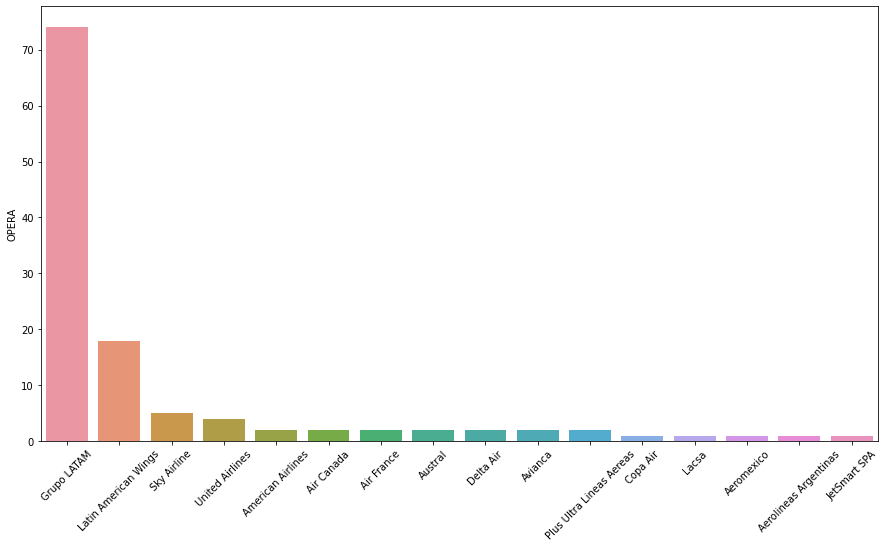

In [138]:
plt.figure(figsize = (15,8))
ax = sns.barplot(dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts().index, dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA.value_counts())
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

In [48]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA=='Latin American Wings'

6018     False
6020     False
6022     False
6023     False
6025     False
         ...  
65532    False
65533    False
65534    False
65535    False
68068    False
Name: OPERA, Length: 1850, dtype: bool

In [49]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']][dataset[dataset['Vlo-O'] != dataset['Vlo-I']].OPERA=='Latin American Wings']

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,0,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6086,2017-01-18 01:15:00,700,SCEL,SPJC,LAW,2017-01-18 01:36:00,702,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6095,2017-01-05 01:15:00,704,SCEL,SPJC,LAW,2017-01-05 01:15:00,708,SCEL,SPJC,56R,5,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6098,2017-01-12 01:15:00,704,SCEL,SPJC,LAW,2017-01-12 01:55:00,702,SCEL,SPJC,56R,12,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6107,2017-01-03 01:15:00,1704,SCEL,SPJC,LAW,2017-01-03 02:38:00,1700,SCEL,SPJC,56R,3,1,2017,Martes,I,Latin American Wings,Santiago,Lima
11644,2017-02-03 01:15:00,702,SCEL,SPJC,LAW,2017-02-03 01:17:00,700,SCEL,SPJC,JMR,3,2,2017,Viernes,I,Latin American Wings,Santiago,Lima
11645,2017-02-17 01:15:00,702,SCEL,SPJC,LAW,2017-02-17 02:20:00,700,SCEL,SPJC,JMR,17,2,2017,Viernes,I,Latin American Wings,Santiago,Lima
11647,2017-02-01 01:15:00,704,SCEL,SPJC,LAW,2017-02-01 02:31:00,702,SCEL,SPJC,JMR,1,2,2017,Miercoles,I,Latin American Wings,Santiago,Lima
17087,2017-03-26 14:00:00,204,SCEL,SPJC,LAW,2017-03-26 15:18:00,202,SCEL,SPJC,JMR,26,3,2017,Domingo,I,Latin American Wings,Santiago,Lima
17092,2017-03-19 01:15:00,700,SCEL,SPJC,LAW,2017-03-19 01:21:00,704,SCEL,SPJC,JMR,19,3,2017,Domingo,I,Latin American Wings,Santiago,Lima


In [44]:
dataset[dataset['Vlo-O'] == dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [56]:
dataset['Vlo-O'].value_counts()==400.0

174     False
11      False
116     False
150     False
704     False
        ...  
9956    False
2726    False
9860    False
9858    False
1297    False
Name: Vlo-O, Length: 867, dtype: bool

In [59]:
list=dataset['Vlo-O'].unique()

In [65]:
list[0]

'226'

In [63]:
type(list)

numpy.ndarray

In [75]:
dec=[]
for elem in list:
    if str(elem).find('.') > 0:
        dec.append(elem)

In [78]:
dataset['Vlo-O'][dataset['Vlo-O']==400.0]=400.0

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3618596498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==400.0]=400.0


In [79]:
dataset['Vlo-O'][dataset['Vlo-O']==400.0]

68200    400.0
68201    400.0
68202    400.0
68203    400.0
68204    400.0
68205    400.0
Name: Vlo-O, dtype: object

In [80]:
dec[0]

'150.0'

In [82]:
float(dec[0])

150.0

In [83]:
int(float(dec[0]))

150

In [96]:
dataset['Vlo-O'][0]

'226'

In [113]:
type(dataset['Vlo-O'][1933])

str

In [90]:
dataset['Vlo-I']=str(dataset['Vlo-I'])

In [109]:
dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]

63806    150.0
63807    150.0
63808    150.0
63809    150.0
63810    150.0
63811    150.0
63812    150.0
63813    150.0
63814    150.0
63815    150.0
63816    150.0
63817    150.0
63818    150.0
63819    150.0
63820    150.0
63821    150.0
63822    150.0
64839    150.0
64840    150.0
64841    150.0
64842    150.0
64843    150.0
64844    150.0
64845    150.0
64846    150.0
64847    150.0
64848    150.0
64849    150.0
64850    150.0
64851    150.0
64852    150.0
64853    150.0
64854    150.0
64855    150.0
64856    150.0
64857    150.0
64858    150.0
64859    150.0
64860    150.0
64861    150.0
Name: Vlo-O, dtype: object

In [114]:
dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]=str(int(float(dec[0])))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\2365872768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==dec[0]]=str(int(float(dec[0])))


In [110]:
dataset['Vlo-I'][dataset['Vlo-I']==str(150)]

1933     150
1934     150
1935     150
1936     150
1937     150
        ... 
64857    150
64858    150
64859    150
64860    150
64861    150
Name: Vlo-I, Length: 557, dtype: object

In [115]:
dataset['Vlo-O'][dataset['Vlo-O']==str(150)]

1933     150
1934     150
1935     150
1936     150
1937     150
        ... 
64857    150
64858    150
64859    150
64860    150
64861    150
Name: Vlo-O, Length: 557, dtype: object

In [116]:
dataset['Vlo-I'][dataset['Vlo-I']==str(150)] == dataset['Vlo-O'][dataset['Vlo-O']==str(150)]

1933     True
1934     True
1935     True
1936     True
1937     True
         ... 
64857    True
64858    True
64859    True
64860    True
64861    True
Length: 557, dtype: bool

In [117]:
for elem in dec:
    dataset['Vlo-O'][dataset['Vlo-O']==elem]=str(int(float(elem)))

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_23096\3757080042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Vlo-O'][dataset['Vlo-O']==elem]=str(int(float(elem)))


In [119]:
type(dataset['Vlo-O'][68204])

str

In [128]:
type(dataset['Vlo-I'][68204])

str

In [127]:
dataset['Vlo-I']=dataset['Vlo-I'].astype(str)

In [129]:
dataset[dataset['Vlo-O'] != dataset['Vlo-I']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6018,2017-01-05 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-05 09:36:00,1001,SCEL,SAEZ,LAN,5,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6020,2017-01-07 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-07 06:59:00,1001,SCEL,SAEZ,LAN,7,1,2017,Sabado,I,Grupo LATAM,Santiago,Buenos Aires
6022,2017-01-12 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-12 08:05:00,1003,SCEL,SAEZ,LAN,12,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
6023,2017-01-13 07:05:00,4501,SCEL,SAEZ,LAN,2017-01-13 07:06:00,1001,SCEL,SAEZ,LAN,13,1,2017,Viernes,I,Grupo LATAM,Santiago,Buenos Aires
6025,2017-01-19 10:50:00,4501,SCEL,SAEZ,LAN,2017-01-19 10:56:00,1001,SCEL,SAEZ,LAN,19,1,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60565,2017-11-05 22:10:00,530,SCEL,SPJC,LAN,2017-11-05 22:24:00,534,SCEL,SPJC,LAN,5,11,2017,Domingo,I,Grupo LATAM,Santiago,Lima
61354,2017-11-09 11:20:00,7811,SCEL,SAEZ,LAN,2017-11-09 12:23:00,1103,SCEL,SAEZ,LAN,9,11,2017,Jueves,I,Grupo LATAM,Santiago,Buenos Aires
61426,2017-11-05 16:30:00,207,SCEL,SCIE,LXP,2017-11-05 18:22:00,207R,SCEL,SCIE,LXP,5,11,2017,Domingo,N,Grupo LATAM,Santiago,Concepcion
62175,2017-12-20 19:25:00,2287,SCEL,SAEZ,ARG,2017-12-20 20:17:00,1287,SCEL,SAEZ,AUT,20,12,2017,Miercoles,I,Aerolineas Argentinas,Santiago,Buenos Aires


c:\Users\Gerardo\anaconda3\envs\LATAM\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


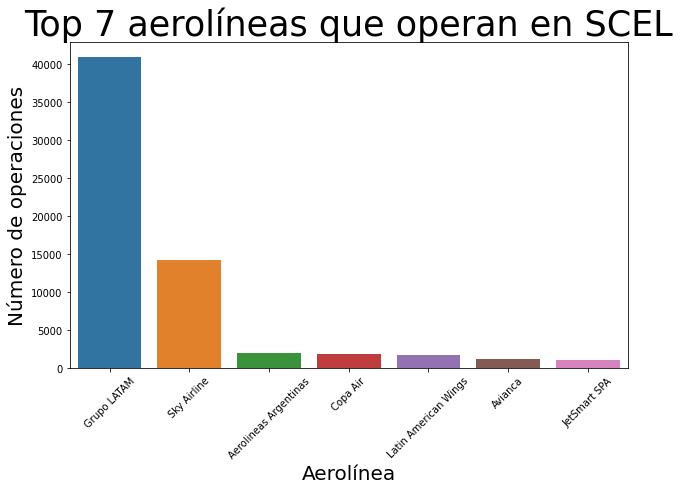

In [154]:
aer_top=[]
aer_top_count=[]
for i in range (7):
    aer_top.append(dataset.OPERA.value_counts().index[i])
    aer_top_count.append(dataset.OPERA.value_counts()[i])
plt.figure(figsize = (10,6))
ax = sns.barplot(aer_top, aer_top_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title('Top 7 aerolíneas que operan en SCEL', fontsize=35)
ax.set_xlabel('Aerolínea', fontsize=20)
ax.set_ylabel('Número de operaciones', fontsize=20)
plt.show()

In [155]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
